In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
from PIL import Image, ImageOps
import numpy as np
import sys
import os
from os import listdir
from os.path import isfile, join
import csv

In [2]:
url = 'https://i.imgur.com/BcdhHYJ.png'

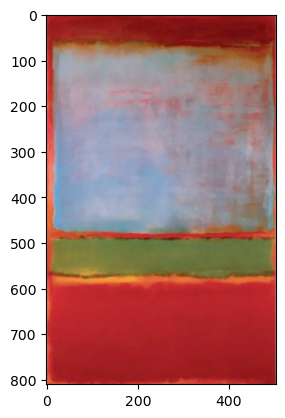

In [3]:
rothko = plt.imread('No6.png')
plt.imshow(rothko)
plt.show()

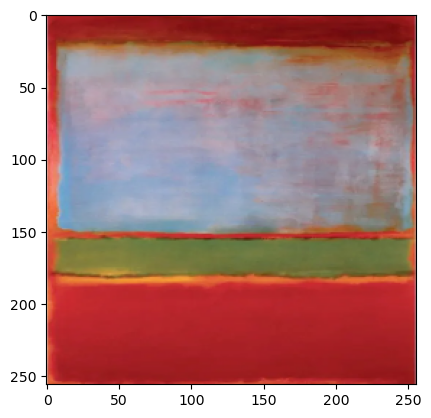

In [4]:
resized_img = cv2.resize(rothko, (256, 256))
plt.imshow(resized_img)
plt.show()

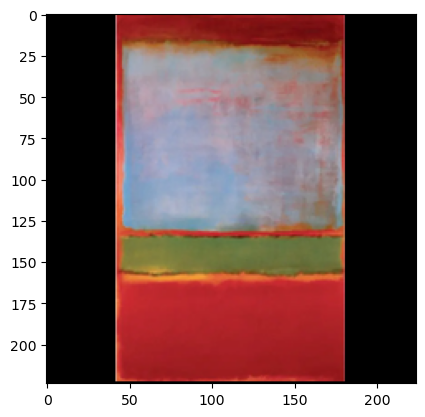

In [5]:
desired_size = 224

im = Image.open('No6.png')
old_size = im.size  # old_size[0] is in (width, height) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])

im = im.resize(new_size, Image.Resampling.LANCZOS)

# create a new image and paste the resized on it

new_im = Image.new("RGB", (desired_size, desired_size))
new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))

plt.imshow(new_im)
plt.show()

In [6]:
def pad_and_resize(img, desired_size):
    im = Image.open(images_dir + '/' + img)
    old_size = im.size

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    im = im.resize(new_size, Image.Resampling.LANCZOS)

    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2, (desired_size-new_size[1])//2))

    plt.imshow(new_im)
    plt.show()

In [7]:
images_dir = 'C:/Users/Balon1/Desktop/IT/Data Science/Public_projects/02. Mark_Rothko_Project/images'

In [8]:
image_list = os.listdir(images_dir)
image_list

['Rothko 454.png',
 'Rothko 470.png',
 'Rothko 492.png',
 'Rothko 536.png',
 'Rothko 564.png',
 'Rothko 576.png',
 'Rothko 590.png',
 'Rothko 624.png',
 'Rothko 683.png',
 'Rothko 714.png',
 'Rothko 741.png',
 'Rothko 752.png']

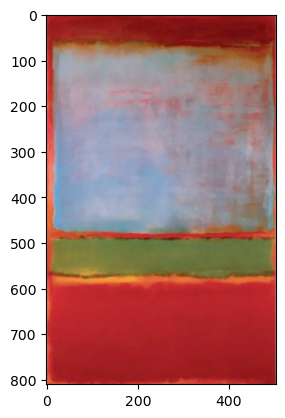

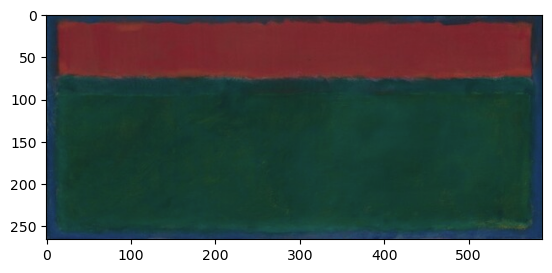

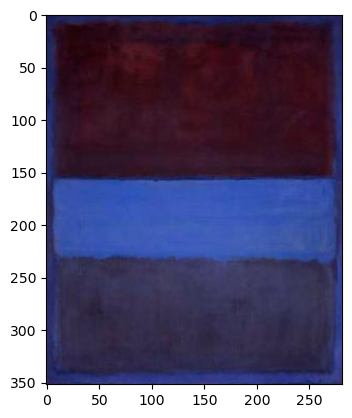

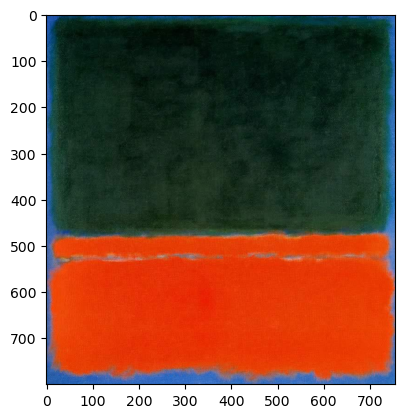

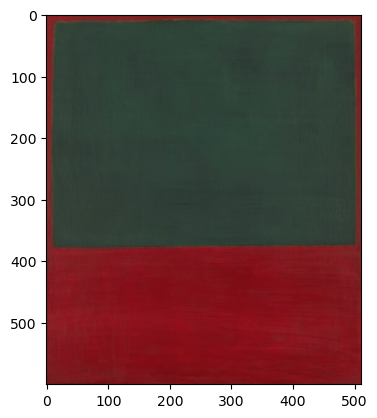

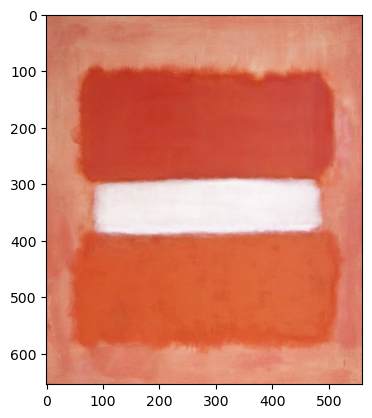

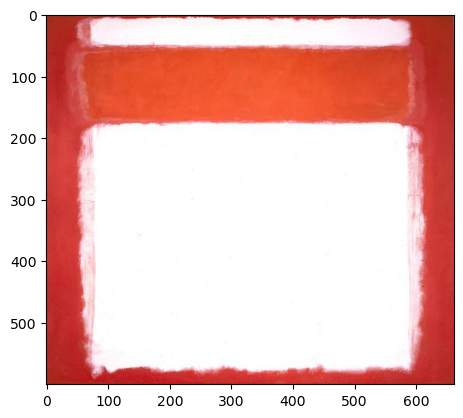

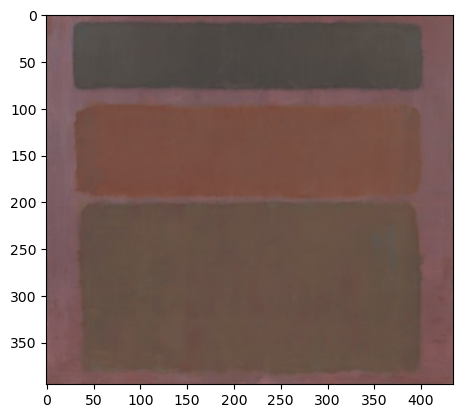

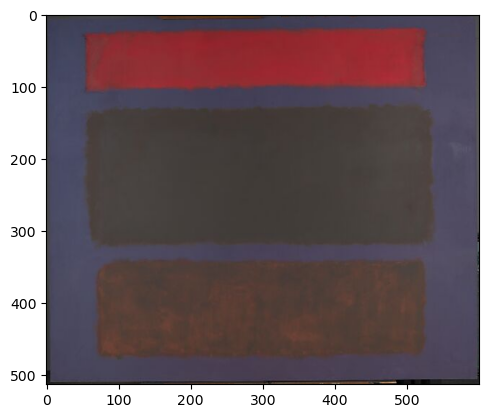

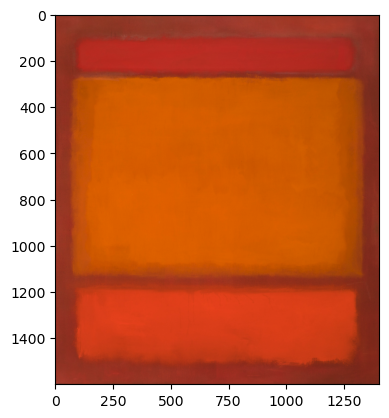

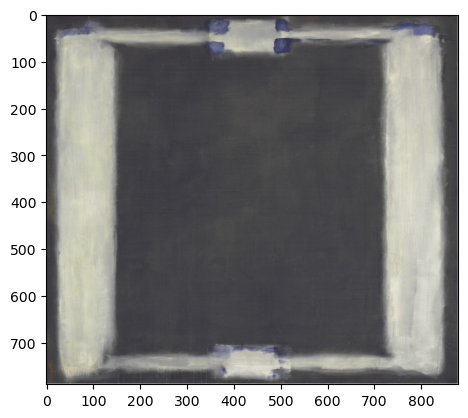

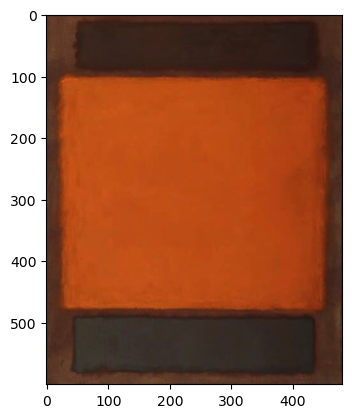

In [9]:
for i in np.arange(0,12):
    img = Image.open(images_dir + '/' + image_list[i])
    plt.imshow(img)
    plt.show()

In [10]:
for i in np.arange(0,12):
    img = cv2.imread(images_dir + '/' + image_list[i])
    print(img.shape)

(810, 503, 3)
(266, 588, 3)
(352, 282, 3)
(800, 755, 3)
(600, 511, 3)
(655, 560, 3)
(600, 661, 3)
(395, 435, 3)
(513, 600, 3)
(1600, 1403, 3)
(789, 879, 3)
(600, 480, 3)


# Padding and resizing images

In [11]:
def pad_and_resize(img, desired_size):
    im = Image.open(images_dir + '/' + img)
    old_size = im.size

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    im = im.resize(new_size, Image.Resampling.LANCZOS)

    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2, (desired_size-new_size[1])//2))

    plt.imshow(new_im)
    plt.show()

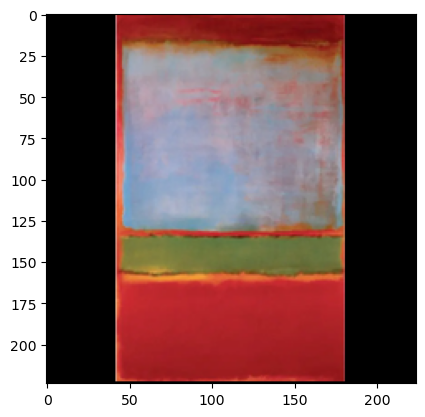

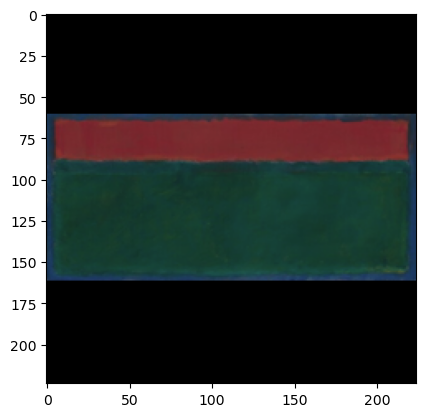

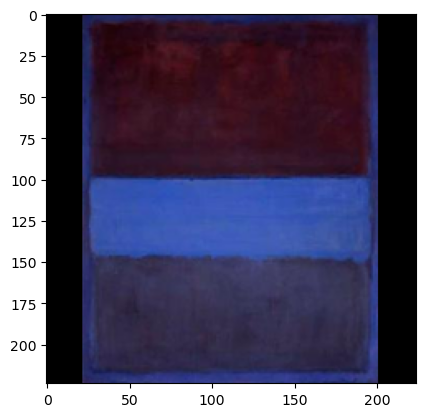

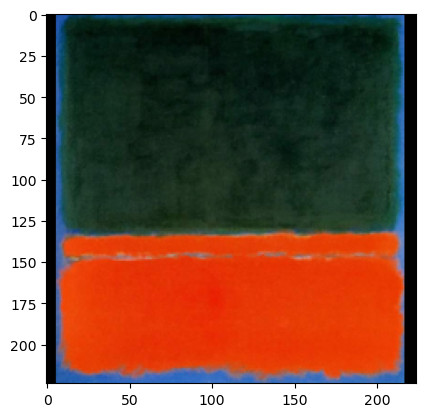

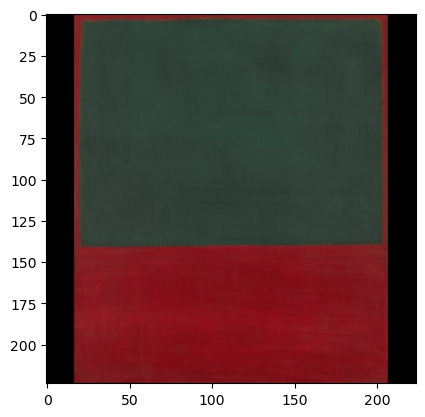

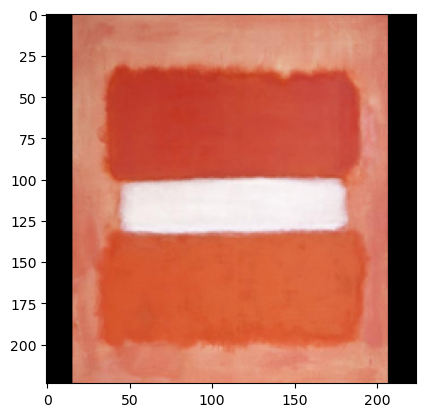

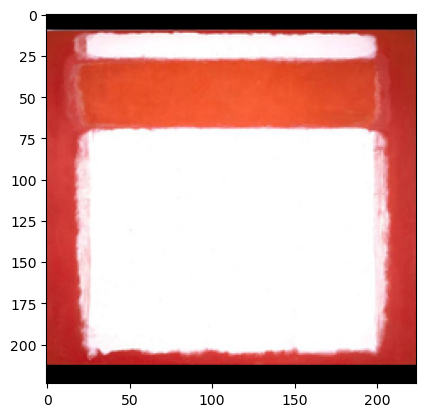

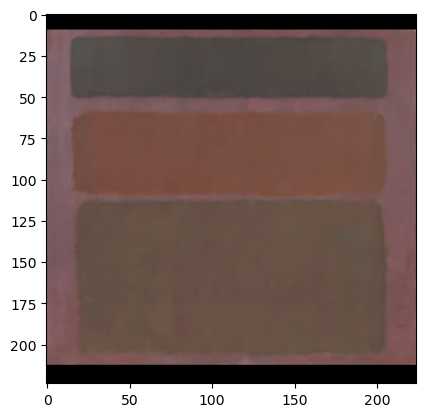

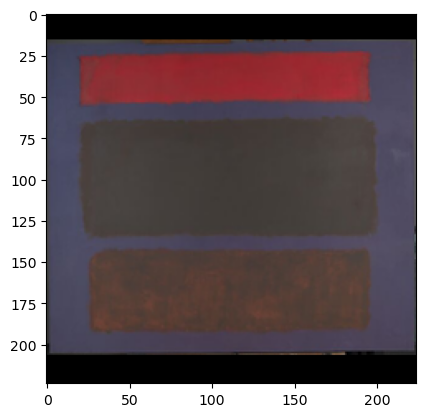

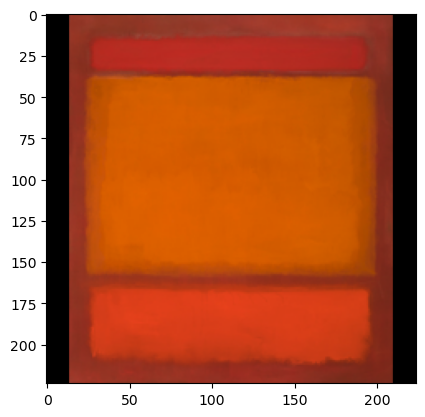

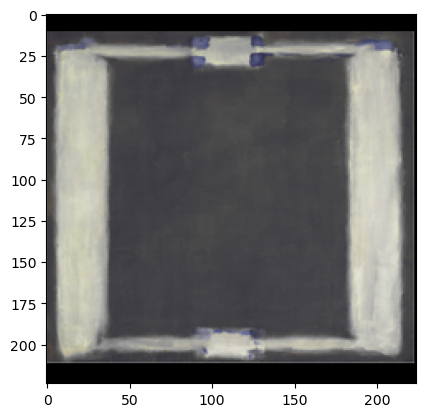

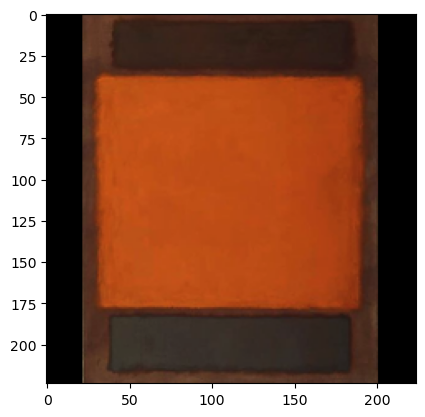

In [32]:
for i in np.arange(0,12):
    pad_and_resize(image_list[i], 224)

In [52]:
def pad_resize_return(img, desired_size):
    im = Image.open(images_dir + '/' + img)
    old_size = im.size

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    im = im.resize(new_size, Image.Resampling.LANCZOS)

    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2, (desired_size-new_size[1])//2))
    
    return new_im

# Edge detection

In [14]:
def Canny_detector(img, weak_th = None, strong_th = None):
    
    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)
       
    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
      
    # Conversion of Cartesian coordinates to polar 
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
       
    # setting the minimum and maximum thresholds 
    # for double thresholding
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image  
    height, width = img.shape
       
    # Looping through every pixel of the grayscale 
    # image
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
              
            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
               
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
       
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
       
       
    # finally returning the magnitude of
    # gradients of edges
    return mag

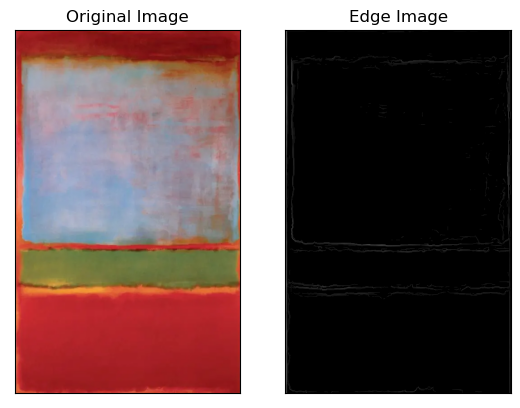

In [15]:
canny_img = Canny_detector(rothko)
   
# Displaying the input and output image
plt.subplot(121),plt.imshow(rothko, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

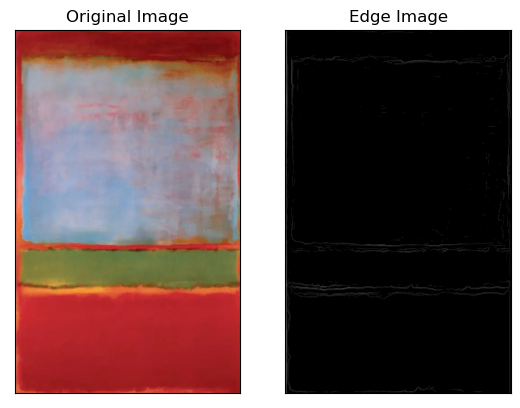

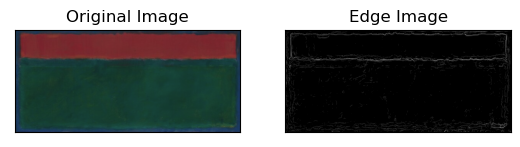

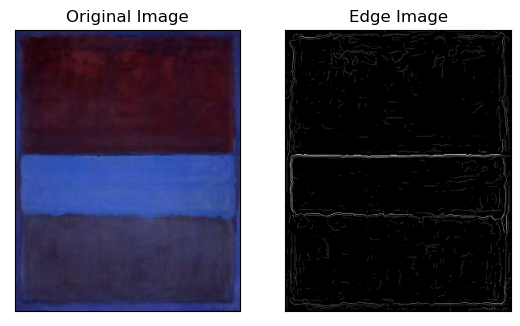

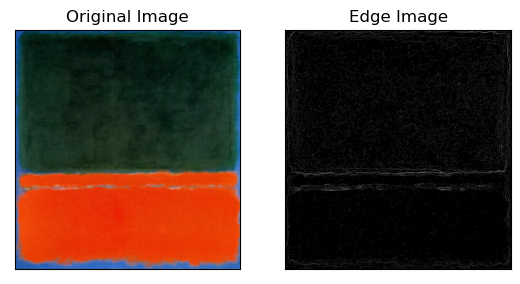

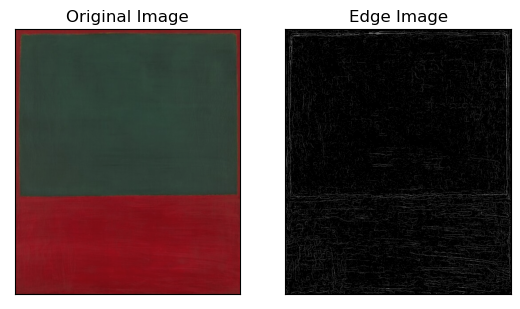

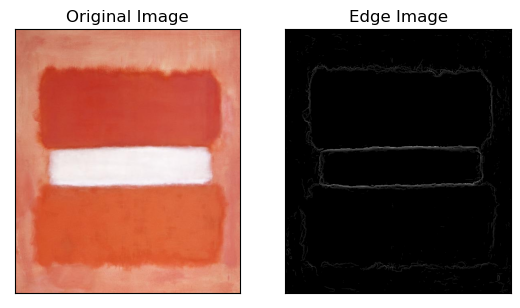

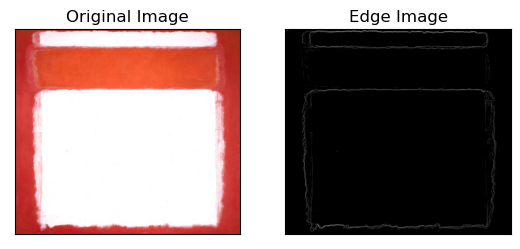

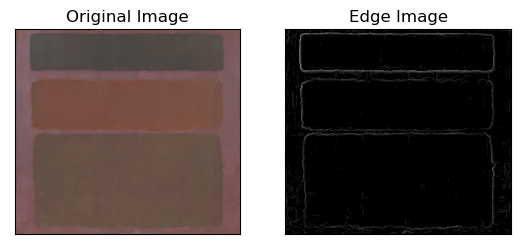

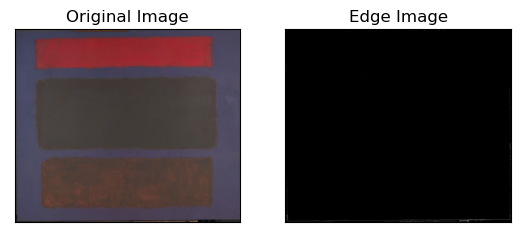

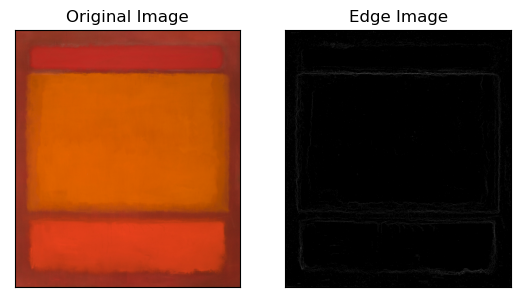

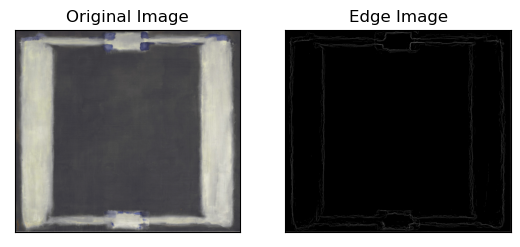

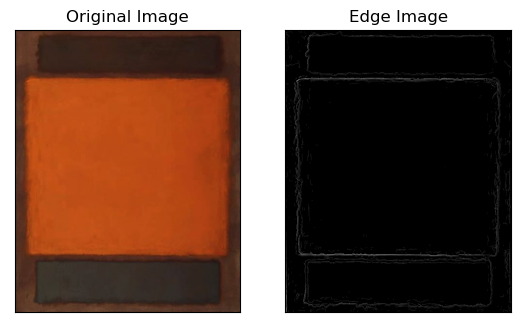

In [16]:
for i in np.arange(0,12):
    x = Canny_detector(cv2.imread(images_dir + '/' + image_list[i]))
    
    plt.subplot(121),plt.imshow(Image.open(images_dir + '/' + image_list[i]))
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(x,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

# Padding and edge detecting

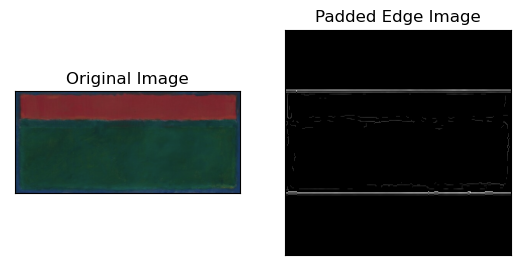

In [61]:
canny_img = Canny_detector(np.array(pad_resize_return(image_list[1], 224), dtype="uint8"))
   
# Displaying the input and output image
plt.subplot(121),plt.imshow(Image.open(images_dir + '/' + image_list[1]))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_img,cmap = 'gray')
plt.title('Padded Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

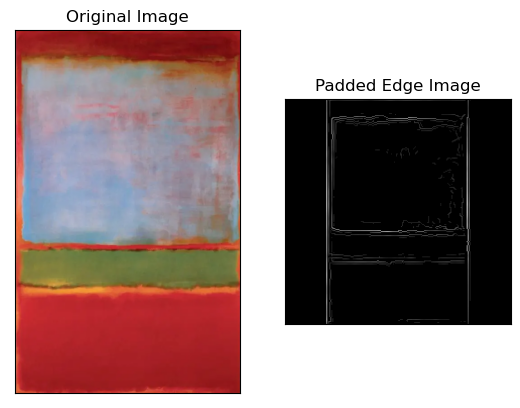

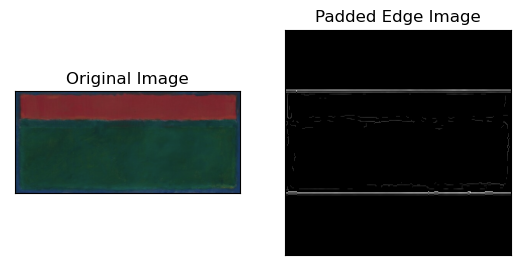

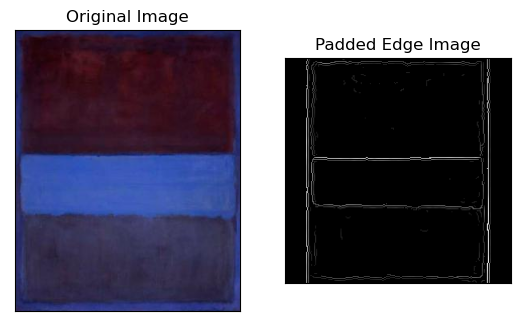

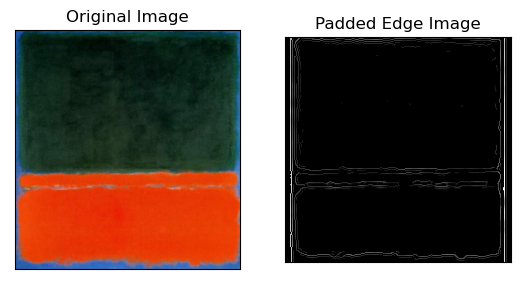

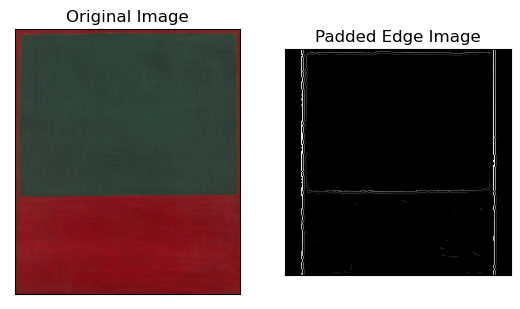

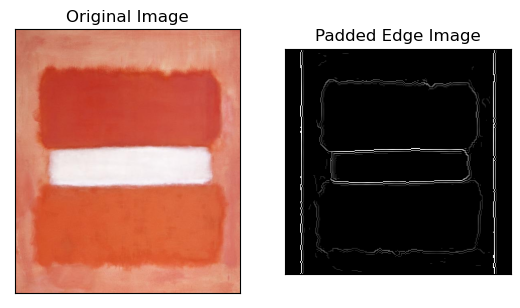

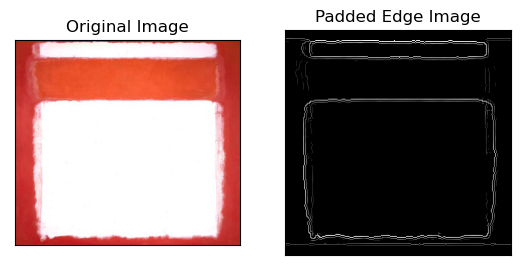

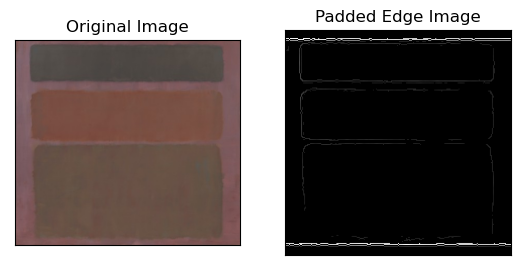

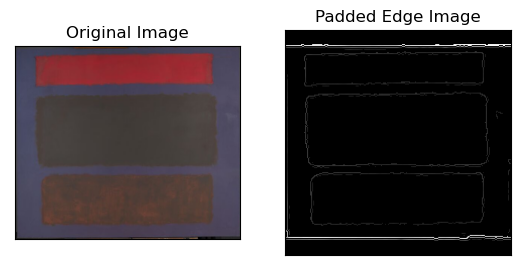

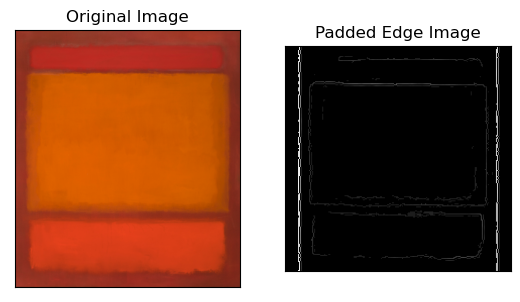

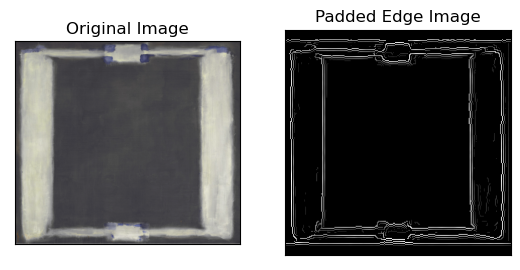

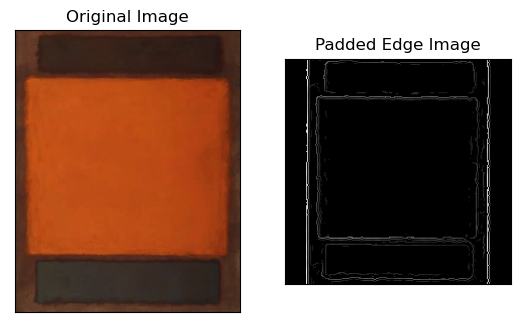

In [62]:
for i in np.arange(0,12):
    canny_img = Canny_detector(np.array(pad_resize_return(image_list[i], 224), dtype="uint8"))
   
    plt.subplot(121),plt.imshow(Image.open(images_dir + '/' + image_list[i]))
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(canny_img,cmap = 'gray')
    plt.title('Padded Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

# Shape detection